Berikut adalah kode dari Decision Tree menggunakan sklearn

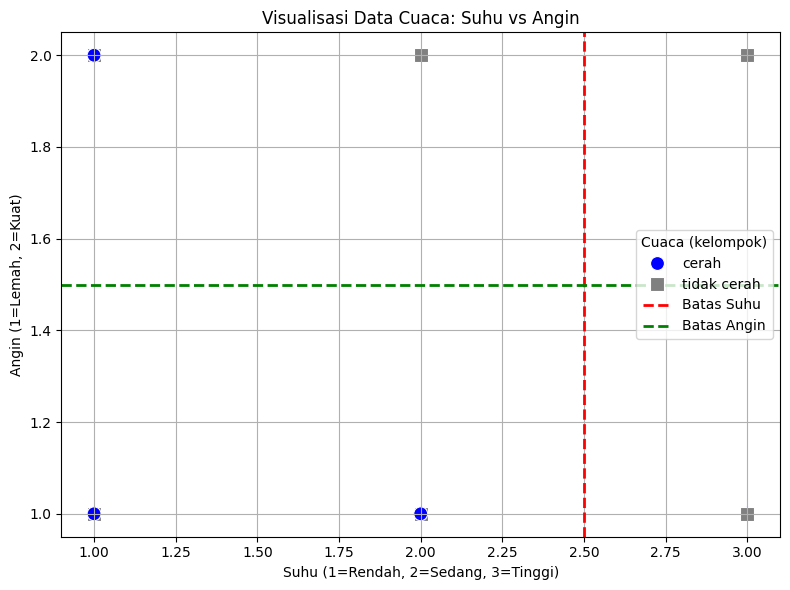

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Buat DataFrame dari data yang kamu berikan
data = {
    'No': list(range(1, 16)),
    'Suhu': ['Tinggi', 'Tinggi', 'Sedang', 'Rendah', 'Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Tinggi', 'Rendah', 'Tinggi', 'Sedang', 'Sedang', 'Sedang', 'Rendah'],
    'Angin': ['Lemah', 'Kuat', 'Lemah', 'Lemah', 'Kuat', 'Kuat', 'Lemah', 'Lemah', 'Kuat', 'Lemah', 'Lemah', 'Kuat', 'Lemah', 'Kuat', 'Kuat'],
    'Cuaca': ['Cerah', 'Cerah', 'Mendung', 'Hujan', 'Hujan', 'Cerah', 'Mendung', 'Hujan', 'Hujan', 'Cerah', 'Mendung', 'Mendung', 'Cerah', 'Hujan', 'Cerah']
}

df = pd.DataFrame(data)

# Label encoding manual untuk plotting
map_suhu = {'Rendah': 1, 'Sedang': 2, 'Tinggi': 3}
map_angin = {'Lemah': 1, 'Kuat': 2}
map_cuaca = {'Cerah': 'cerah', 'Hujan': 'tidak cerah', 'Mendung': 'tidak cerah'}

df['suhu_num'] = df['Suhu'].map(map_suhu)
df['angin_num'] = df['Angin'].map(map_angin)
df['cuaca_grouped'] = df['Cuaca'].map(map_cuaca)

# Visualisasi seperti scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='suhu_num',
    y='angin_num',
    hue='cuaca_grouped',
    style='cuaca_grouped',
    palette={'cerah': 'blue', 'tidak cerah': 'gray'},
    markers={'cerah': 'o', 'tidak cerah': 's'},
    s=100
)

# Tambahkan garis batas sederhana (contoh threshold)
plt.axvline(x=2.5, color='red', linestyle='--', linewidth=2, label='Batas Suhu')
plt.axhline(y=1.5, color='green', linestyle='--', linewidth=2, label='Batas Angin')

# Label dan judul
plt.title('Visualisasi Data Cuaca: Suhu vs Angin')
plt.xlabel('Suhu (1=Rendah, 2=Sedang, 3=Tinggi)')
plt.ylabel('Angin (1=Lemah, 2=Kuat)')

plt.legend(title='Cuaca (kelompok)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text

# Data
data = {
    'Suhu': ['Tinggi','Tinggi','Sedang','Rendah','Rendah','Rendah','Sedang','Tinggi','Tinggi','Rendah','Tinggi','Sedang','Sedang','Sedang','Rendah'],
    'Angin': ['Lemah','Kuat','Lemah','Lemah','Kuat','Kuat','Lemah','Lemah','Kuat','Lemah','Lemah','Kuat','Lemah','Kuat','Kuat'],
    'Cuaca': ['Cerah','Cerah','Mendung','Hujan','Hujan','Cerah','Mendung','Hujan','Hujan','Cerah','Mendung','Mendung','Cerah','Hujan','Cerah']
}

df = pd.DataFrame(data)

# Encode
df['Suhu'] = df['Suhu'].map({'Tinggi':0, 'Sedang':1, 'Rendah':2})
df['Angin'] = df['Angin'].map({'Lemah':0, 'Kuat':1})
df['Cuaca'] = df['Cuaca'].astype('category').cat.codes

X = df[['Suhu', 'Angin']]
y = df['Cuaca']

# Train model
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf.fit(X, y)

# Tree structure
print(export_text(clf, feature_names=['Suhu', 'Angin']))

# Uji data baru
uji = pd.DataFrame({'Suhu':[0,2], 'Angin':[0,1]})  # Tinggi-Lemah, Rendah-Kuat
print("Prediksi:", clf.predict(uji))


|--- Suhu <= 1.50
|   |--- Suhu <= 0.50
|   |   |--- class: 0
|   |--- Suhu >  0.50
|   |   |--- class: 2
|--- Suhu >  1.50
|   |--- Angin <= 0.50
|   |   |--- class: 0
|   |--- Angin >  0.50
|   |   |--- class: 0

Prediksi: [0 0]


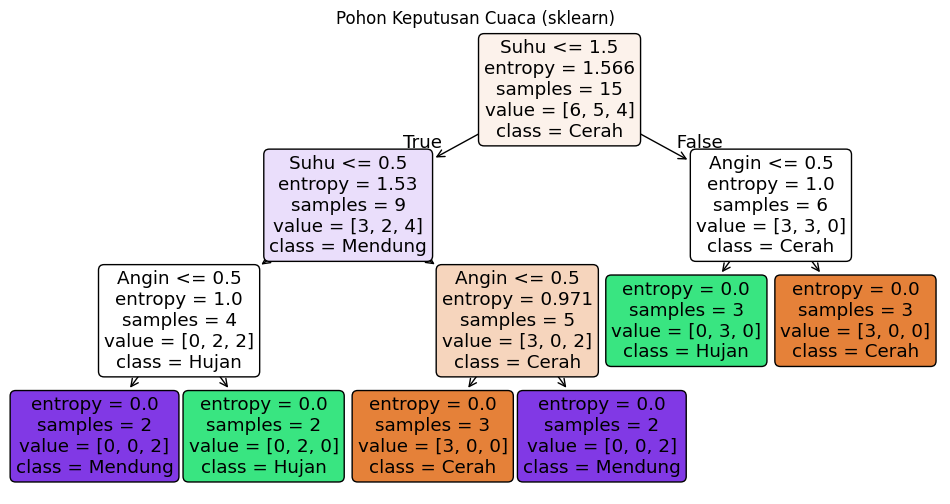

In [3]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Data asli
data = {
    'Suhu': ['Tinggi', 'Tinggi', 'Sedang', 'Sedang', 'Rendah', 'Rendah', 'Tinggi', 'Tinggi', 'Sedang', 'Sedang', 'Rendah', 'Rendah', 'Tinggi', 'Sedang', 'Tinggi'],
    'Angin': ['Lemah', 'Kuat', 'Lemah', 'Kuat', 'Lemah', 'Kuat', 'Lemah', 'Kuat', 'Lemah', 'Kuat', 'Lemah', 'Kuat', 'Lemah', 'Kuat', 'Kuat'],
    'Cuaca': ['Cerah', 'Hujan', 'Mendung', 'Cerah', 'Hujan', 'Mendung', 'Cerah', 'Hujan', 'Mendung', 'Cerah', 'Hujan', 'Mendung', 'Cerah', 'Cerah', 'Hujan']
}

df = pd.DataFrame(data)

# Encode data kategorikal menjadi numerik
le_suhu = LabelEncoder()
le_angin = LabelEncoder()
le_cuaca = LabelEncoder()

df['Suhu_enc'] = le_suhu.fit_transform(df['Suhu'])
df['Angin_enc'] = le_angin.fit_transform(df['Angin'])
df['Cuaca_enc'] = le_cuaca.fit_transform(df['Cuaca'])

# Fitur dan target
X = df[['Suhu_enc', 'Angin_enc']]
y = df['Cuaca_enc']

# Decision Tree Classifier
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
clf = clf.fit(X, y)

# Plot pohon keputusan
plt.figure(figsize=(12, 6))
tree.plot_tree(clf, 
               feature_names=['Suhu', 'Angin'], 
               class_names=le_cuaca.classes_, 
               filled=True, 
               rounded=True)
plt.title("Pohon Keputusan Cuaca (sklearn)")
plt.show()


Berikut ini kode Python lengkap untuk memproses dan menguji data baru

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text

# Data asli
data = {
    'Suhu': ['Tinggi','Tinggi','Sedang','Rendah','Rendah','Rendah','Sedang','Tinggi','Tinggi','Rendah','Tinggi','Sedang','Sedang','Sedang','Rendah'],
    'Angin': ['Lemah','Kuat','Lemah','Lemah','Kuat','Kuat','Lemah','Lemah','Kuat','Lemah','Lemah','Kuat','Lemah','Kuat','Kuat'],
    'Cuaca': ['Cerah','Cerah','Mendung','Hujan','Hujan','Cerah','Mendung','Hujan','Hujan','Cerah','Mendung','Mendung','Cerah','Hujan','Cerah']
}

df = pd.DataFrame(data)

# Encode data
encode_suhu = {'Tinggi': 0, 'Sedang': 1, 'Rendah': 2}
encode_angin = {'Lemah': 0, 'Kuat': 1}
encode_cuaca = {'Cerah': 0, 'Mendung': 1, 'Hujan': 2}
decode_cuaca = {v: k for k, v in encode_cuaca.items()}

df['Suhu'] = df['Suhu'].map(encode_suhu)
df['Angin'] = df['Angin'].map(encode_angin)
df['Cuaca'] = df['Cuaca'].map(encode_cuaca)

X = df[['Suhu', 'Angin']]
y = df['Cuaca']

# Model
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf.fit(X, y)

# Uji data baru
uji = pd.DataFrame({
    'Suhu': [0, 2, 1, 0],      # Tinggi, Rendah, Sedang, Tinggi
    'Angin': [0, 1, 1, 1]      # Lemah, Kuat, Kuat, Kuat
})

# Prediksi dan tampilkan hasilnya
hasil = clf.predict(uji)
hasil = [decode_cuaca[x] for x in hasil]
uji['Prediksi Sklearn'] = hasil

print(uji)
print(export_text(clf, feature_names=['Suhu', 'Angin']))

   Suhu  Angin Prediksi Sklearn
0     0      0            Cerah
1     2      1            Cerah
2     1      1          Mendung
3     0      1            Cerah
|--- Suhu <= 1.50
|   |--- Suhu <= 0.50
|   |   |--- class: 0
|   |--- Suhu >  0.50
|   |   |--- class: 1
|--- Suhu >  1.50
|   |--- Angin <= 0.50
|   |   |--- class: 0
|   |--- Angin >  0.50
|   |   |--- class: 0

